# 2013 Boston Marathon Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
df = pd.read_csv('boston_mar_results_2013.csv')
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [3]:
df.shape

(16164, 21)

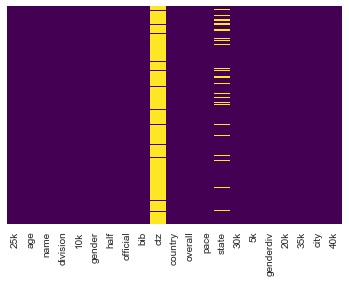

In [4]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [3]:
# dropping ctz because of all the null values
df.drop('ctz',inplace=True, axis=1)

In [4]:
# dropping the remaining states with na values
df.dropna(inplace=True)

In [5]:
# instead of nulls, empty values were marked with a dash - so we need to clean these missing values
df = df[df['5k']!='-']

In [6]:
# converting column to floats for later
df['5k'] = pd.to_numeric(df['5k'])

In [7]:
# removing na values
df = df[df['10k']!='-']

In [8]:
# converting column to floats for later
df['10k'] = pd.to_numeric(df['10k'])

In [9]:
# removing na values
df = df[df['20k']!='-']

In [10]:
# converting column to floats for later
df['20k'] = pd.to_numeric(df['20k'])

In [11]:
# removing na values
df = df[df['25k']!='-']

In [12]:
# converting column to floats for later
df['25k'] = pd.to_numeric(df['25k'])

In [13]:
# removing na values
df = df[df['30k']!='-']

In [14]:
# converting column to floats for later
df['30k'] = pd.to_numeric(df['30k'])

In [15]:
# removing na values
df = df[df['35k']!='-']

In [16]:
# converting column to floats for later
df['35k'] = pd.to_numeric(df['35k'])

In [17]:
# removing na values
df = df[df['40k']!='-']

In [18]:
# converting column to floats for later
df['40k'] = pd.to_numeric(df['40k'])

In [19]:
# removing na values
df = df[df['half']!='-']

In [20]:
# converting column to floats for later
df['half'] = pd.to_numeric(df['half'])

In [21]:
df.shape

(14609, 20)

In [22]:
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'country', 'overall', 'pace', 'state', '30k', '5k', 'genderdiv',
       '20k', '35k', 'city', '40k'],
      dtype='object')

In [21]:
# creating dataframe for features
features = pd.DataFrame()

In [22]:
# selecting features
features = df[['age','5k','10k','20k','half','25k','30k','35k','40k','pace',
               'division','genderdiv','gender','overall','official']]

In [23]:
# creating category for gender
features['gender'] = np.where(features['gender'] == 'M', 1, 0)

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# imports 
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# selecting features to normalize and cluster
X = features[['5k','10k','20k','half','25k','30k','35k','40k','pace','gender','genderdiv','division','overall','official','age']]

## K-Means

In [26]:
# imports
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from itertools import cycle

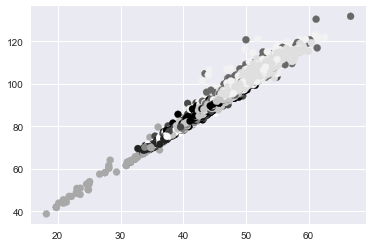

In [27]:
# Normalize the data.
X_norm = normalize(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=10, random_state=42).fit_predict(X_norm)

# Plot the solution.
plt.scatter(features['10k'], features['20k'], c=y_pred)
plt.show()

In [36]:
# testing cluster against age
adjusted_rand_score(y_pred, y_train)
# data is pretty random

0.053931077006710598

In [37]:
# imports
from sklearn import metrics
from sklearn.metrics import pairwise_distances
model = KMeans(n_clusters=8, random_state=42).fit(X_norm)
labels = model.labels_
print(metrics.silhouette_score(X_norm, labels, metric='euclidean'))

0.537458219677


In [57]:
# adding group value back to features, plus 1 to make it prettier
features['km_group'] = y_pred + 1

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
# using groupby on clusters
features.groupby(['km_group']).mean().sort_values('official')

,age,5k,10k,20k,half,25k,30k,35k,40k,pace,division,genderdiv,gender,overall,official
km_group,,,,,,,,,,,,,,,
5,31.428571,15.808286,31.816286,64.615929,68.100500,81.026643,98.447071,116.345500,133.392143,5.396857,40.421429,57.064286,0.95,64.264286,141.327357
9,31.037383,18.493832,36.878879,73.907991,77.923645,92.394766,111.459159,130.887477,150.528411,6.083785,178.677570,242.803738,1.00,261.808411,159.290140
1,30.391026,19.749343,39.342340,78.827131,83.119872,98.631715,119.069647,139.962067,161.042244,6.504247,649.516026,818.229167,1.00,866.315705,170.318734
6,45.434457,20.035955,39.910262,79.973820,84.329925,100.039963,120.716217,141.760712,162.803109,6.575318,84.711610,984.295880,1.00,1043.000000,172.193745
8,32.225070,21.398925,42.617721,85.479348,90.167933,107.235811,130.077070,154.016284,178.767047,7.238100,2046.369359,3379.893036,1.00,3860.015042,189.570908
10,47.545099,22.574648,44.960991,90.146577,95.083097,112.990004,136.759968,161.311499,186.045643,7.520842,578.572798,4531.565696,1.00,5357.440696,196.976776
4,33.912385,22.977661,45.730428,91.585264,96.587714,114.713933,138.639091,163.101192,187.363090,7.559960,517.288538,868.869565,0.00,5569.884058,198.003498
7,31.848415,25.094571,50.071341,100.858016,106.434221,126.936523,154.388420,182.912738,211.340257,8.533996,2478.969683,3746.512632,0.00,11886.433165,223.535531
2,51.738783,24.820350,49.678084,100.475878,106.062430,126.773943,154.926928,184.897901,215.677612,8.740255,1153.030798,8682.479848,1.00,13104.509886,228.940962


In [68]:
print('The order of groups from fastest to slowest from their official times are', features.groupby(['km_group']).mean().sort_values('official').index)

The order of groups from fastest to slowest from their official times are Int64Index([5, 9, 1, 6, 8, 10, 4, 7, 2, 3], dtype='int64', name='km_group')


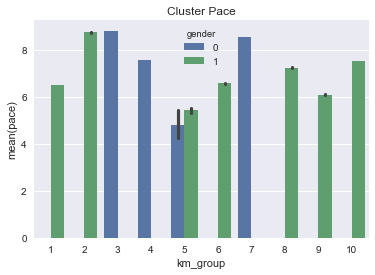

In [59]:
# checking groups pace and gender
sns.barplot(x='km_group', y='pace', data=features, hue='gender')
plt.title('Cluster Pace')
plt.show()

Using this bar graph we can tell a lot about the groups that were created using k-means.  First of all, we can see that every group other than group 5 represents a single sex. While group 5 is a combination of the fastest athletes.

In [61]:
# looking at the fastest group in greater dept
features[features['km_group'] == 5]['gender'].value_counts()

1    133
0      7
Name: gender, dtype: int64

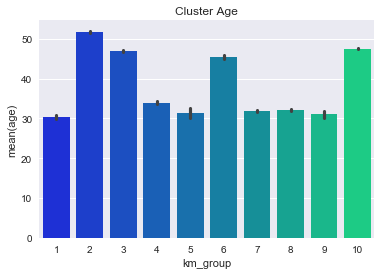

In [60]:
# plotting average age for groups.
sns.barplot(x='km_group', y='age', data=features,palette='winter')
plt.title('Cluster Age')
plt.show()

Looking at the average ages of each group it is no suprise that the lower the average age the faster the group tended to be.  However, group 7 didn't follow this pattern.  They were one of the younger groups but still have the second slowest average. It would be interesting to see more data on these athelets to get insight into why this might be. The only other data we have currently is that this was a cluster of female athelets around 32 years old.  The other group that strayed from this pattern was group 6, 45 year old males.  Even though they were older they were still in the top 3 groups.  

In [69]:
df['km_group'] = features['km_group']

In [79]:
df[df['km_group'] == 5]['state'].value_counts().head()

MA    19
IL    16
CA    12
WA     7
CO     7
Name: state, dtype: int64

Last, we can see the top 5 states the fastest runners came from.